In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path = '36.csv'  
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [3]:
df.head(1)

,Categoria,Subcategoria,Concepto,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Denuncias penales recibidas a/ b/,Manejar vehículo de motor en estado de ebried...,Manejar vehículo de motor en estado de ebried...,2086.0,2589.0,1013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


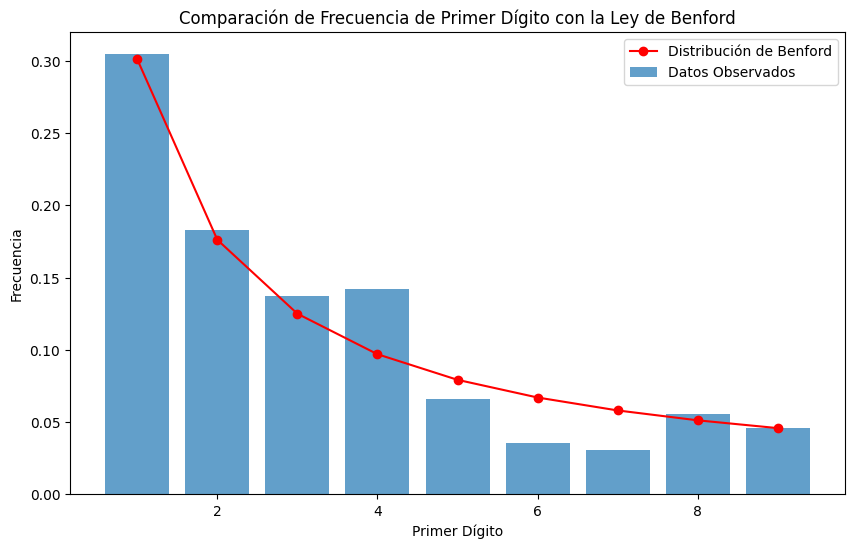

   Dígito  Frecuencia Observada  Frecuencia Esperada
0       1              0.304569             0.301030
1       2              0.182741             0.176091
2       3              0.137056             0.124939
3       4              0.142132             0.096910
4       5              0.065990             0.079181
5       6              0.035533             0.066947
6       7              0.030457             0.057992
7       8              0.055838             0.051153
8       9              0.045685             0.045757


In [6]:
# Función para extraer el primer dígito
def get_first_digit(num):
    if pd.isna(num) or num == 0:
        return None
    return int(str(num).lstrip('0.')[0])

# Extraer todos los valores numéricos del DataFrame
values = df.iloc[:, 3:].values.flatten()

# Obtener los primeros dígitos
first_digits = [get_first_digit(value) for value in values if not pd.isna(value) and value != 0]

# Contar la frecuencia de cada primer dígito
digit_counts = np.bincount(first_digits)[1:]

# Distribución esperada según la Ley de Benford
benford_dist = [np.log10(1 + 1/d) for d in range(1, 10)]

# Calcular las frecuencias esperadas
expected_counts = [p * sum(digit_counts) for p in benford_dist]

# Normalizar las frecuencias obtenidas
digit_freq = digit_counts / sum(digit_counts)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.bar(range(1, 10), digit_freq, label='Datos Observados', alpha=0.7)
plt.plot(range(1, 10), benford_dist, 'ro-', label='Distribución de Benford')
plt.xlabel('Primer Dígito')
plt.ylabel('Frecuencia')
plt.title('Comparación de Frecuencia de Primer Dígito con la Ley de Benford')
plt.legend()
plt.show()

# Mostrar la tabla de frecuencias
frequencies = pd.DataFrame({
    'Dígito': range(1, 10),
    'Frecuencia Observada': digit_freq,
    'Frecuencia Esperada': benford_dist
})

print(frequencies)


In [7]:
from scipy.stats import chisquare
# Prueba de chi-cuadrado
chi2_stat, p_value = chisquare(f_obs=digit_counts, f_exp=expected_counts)

print(f'Chi-squared statistic: {chi2_stat}')
print(f'P-value: {p_value}')

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("La prueba rechaza la hipótesis nula: las frecuencias observadas no siguen la distribución de Benford.")
else:
    print("La prueba no rechaza la hipótesis nula: las frecuencias observadas siguen la distribución de Benford.")

Chi-squared statistic: 10.443255003892572
P-value: 0.23528229695784525
La prueba no rechaza la hipótesis nula: las frecuencias observadas siguen la distribución de Benford.
